In [123]:
import numpy as np
import pandas as pd 
import time, math
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import patsy
from sklearn import neighbors, metrics, svm
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
%matplotlib inline 

In [76]:
plt.set_cmap('hot')

In [3]:
df = pd.read_json('/Users/smoot/Downloads/train.json')
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [20]:
df_t = pd.read_json('/Users/smoot/Downloads/test.json')
df_t.head(4)

(74659, 14)


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r


In [27]:
print 'train:', df.shape
print 'test:', df_t.shape

train: (49352, 15)
test: (74659, 14)


# EDA By Feature

### bathrooms

Interesting things to note:
- There are 313 listings that do not have a bathroom.  
- There are a few outliers to consider (i.e. 10 bathrooms!)
- The distribution of # of bathrooms is not normal.

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64


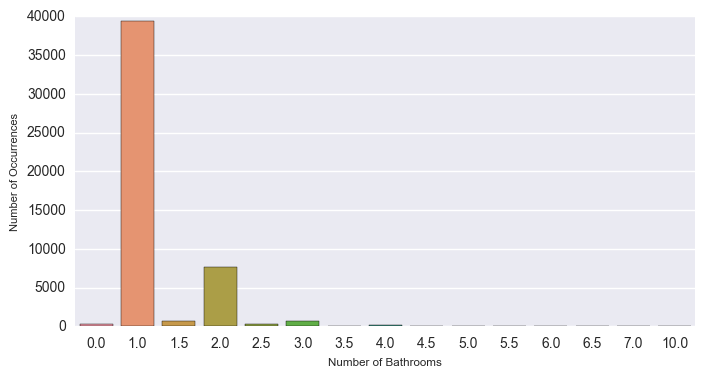

In [77]:
print df['bathrooms'].value_counts()
baths = df['bathrooms'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(baths.index, baths.values, alpha=1, color=None)
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Number of Bathrooms', fontsize='small')
plt.show()

### bedrooms

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64


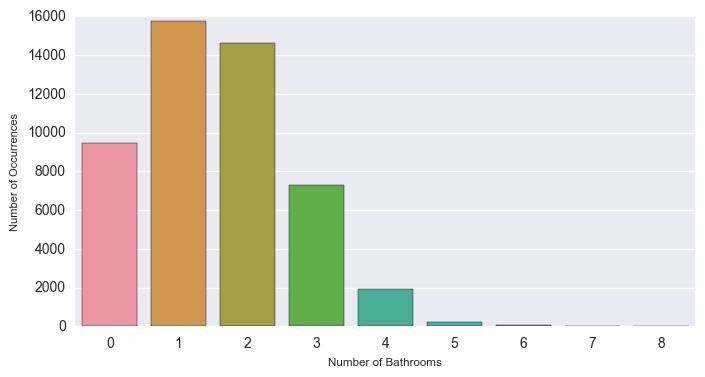

In [68]:
print df['bedrooms'].value_counts()
bedrooms = df['bedrooms'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(bedrooms.index, bedrooms.values, alpha=1)
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Number of Bathrooms', fontsize='small')
plt.show()

In [103]:
mask = (df['bathrooms'] == 0.0) & (df['bedrooms'] == 0)

In [138]:
no_baths = df[mask]
no_baths[:1]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10053,0.0,0,f102c15b1ff51472c24e97f5287de9fa,2016-06-12 14:12:49,,46th Street,[],low,40.6503,7153130,-74.0135,a59839097adcf666abedd22ce8a13f38,[https://photos.renthop.com/2/7153130_8a050b70...,2195,250 46th Street


In [204]:
df_events.to_csv('long_lat.csv')

### longitude & latitude

Looking at the long & lat we can see some outliers.  it appears that there are many listings from Boston, a few from the midwest and there is one in Southern California and even one in Africa!  These will need to be dealt with.

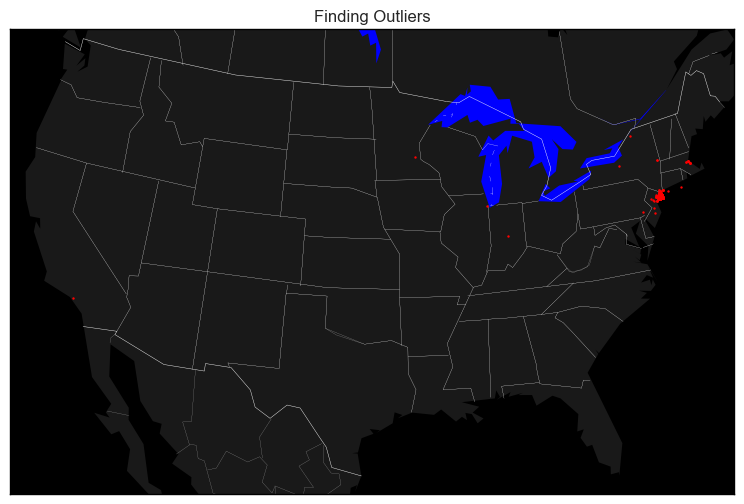

In [206]:
plt.figure(1, figsize=(12,6))

m1 = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='c')


m1.fillcontinents(color='#191919',lake_color='#0000ff') 
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.3, color="w")             
m1.drawstates(linewidth=0.1, color="w")
# Plot the data
mxy = m1(df_events['longitude'].tolist(), df_events['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#ff0000", lw=0, alpha=1, zorder=5)

plt.title("Finding Outliers")
plt.show()

In [36]:
act = pd.read_csv('/Users/smoot/Downloads/act_train.csv', parse_dates=['date'])
ppl = pd.read_csv('/Users/smoot/Downloads/people.csv', parse_dates=['date'])
act_t = pd.read_csv('/Users/smoot/Downloads/act_test.csv', parse_dates=['date'])

In [6]:
ppl.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [9]:
act.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [34]:
act['char_3'].notnull() == True)



[False False False ..., False False False]


In [37]:
for i in range(1, 11):
    act['char_' + str(i)].fillna(value = 'type 0', inplace = True)
for i in range(1, 11):
    act_t['char_' + str(i)].fillna(value = 'type 0', inplace = True)

In [38]:
act['char_1'].fillna(value = 'type 2', inplace = True)
act['char_2'].fillna(value = 'type 2', inplace = True)
act['char_3'].fillna(value = 'type 1', inplace = True)
act['char_4'].fillna(value = 'type 3', inplace = True)
act['char_5'].fillna(value = 'type 6', inplace = True)
act['char_6'].fillna(value = 'type 2', inplace = True)
act['char_7'].fillna(value = 'type 1', inplace = True)
act['char_8'].fillna(value = 'type 4', inplace = True)
act['char_9'].fillna(value = 'type 8', inplace = True)
act['char_10'].fillna(value = 'type 1', inplace = True)
act_t['char_1'].fillna(value = 'type 2', inplace = True)
act_t['char_2'].fillna(value = 'type 2', inplace = True)
act_t['char_3'].fillna(value = 'type 1', inplace = True)
act_t['char_4'].fillna(value = 'type 3', inplace = True)
act_t['char_5'].fillna(value = 'type 6', inplace = True)
act_t['char_6'].fillna(value = 'type 2', inplace = True)
act_t['char_7'].fillna(value = 'type 1', inplace = True)
act_t['char_8'].fillna(value = 'type 4', inplace = True)
act_t['char_9'].fillna(value = 'type 8', inplace = True)
act_t['char_10'].fillna(value = 'type 1', inplace = True)

In [39]:
for i in range(1, 10):
    ppl['char_' + str(i)] = ppl['char_' + str(i)].str.lstrip('type ').astype(np.int32) 
for i in range(10, 38):
    ppl['char_' + str(i)] = ppl['char_' + str(i)].astype(np.int32)
    
for i in range(10, 11):
    act['char_' + str(i)] = act['char_' + str(i)].str.lstrip('type ').astype(np.int32)
# for i in range(10, 11):
#     act_t['char_' + str(i)] = act_t['char_' + str(i)].str.lstrip('type ').astype(np.int32)

for table in [act, ppl]:
    table['year'] = table['date'].dt.year
    table['month'] = table['date'].dt.month
    table['day'] = table['date'].dt.day
    
del ppl['date']
del act['date']
y = act['outcome']
del act['outcome']
del act['year']
del act_t['year']

In [40]:
act.drop(act.ix[:, 4:13], inplace = True, axis = 1)
act_t.drop(act_t.ix[:, 4:13], inplace = True, axis = 1)
act.head()
act_t.shape

(498687, 5)

In [41]:
df = pd.merge(act, ppl, how='left', on='people_id')
df_t = pd.merge(act_t, ppl, how='left', on='people_id')

In [42]:
df['people_id'] = df['people_id'].str.lstrip('ppl_ ')
df['peoples_id'] = pd.to_numeric(df['people_id']) 
df['activity_category'] = df['activity_category'].str.lstrip('type ').astype(int, inplace = True)
df['group_1'] = df['group_1'].str.lstrip('group ').astype(np.int32)
del df['people_id']
del df['group_1']

df_t['people_id'] = df_t['people_id'].str.lstrip('ppl_ ')
df_t['peoples_id'] = pd.to_numeric(df_t['people_id']) 
df_t['activity_category'] = df_t['activity_category'].str.lstrip('type ').astype(int, inplace = True)
df_t['group_1'] = df_t['group_1'].str.lstrip('group ').astype(np.int32)
del df_t['people_id']
del df_t['group_1']

In [45]:
# del df['group_1']
# del df_t['group_1']
# del df['peoples_id']
# del df_t['peoples_id']
df.head()
# df_t.head()

,activity_id,activity_category,char_1_x,year_x,month_x,day_x,char_1_y,char_2,char_3,char_4,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,peoples_id
0,act2_1734928,4,type 0,2023,8,26,2,2,5,5,...,0,1,1,1,0,36,2021,6,29,100.0
1,act2_2434093,2,type 0,2022,9,27,2,2,5,5,...,0,1,1,1,0,36,2021,6,29,100.0
2,act2_3404049,2,type 0,2022,9,27,2,2,5,5,...,0,1,1,1,0,36,2021,6,29,100.0
3,act2_3651215,2,type 0,2023,8,4,2,2,5,5,...,0,1,1,1,0,36,2021,6,29,100.0
4,act2_4109017,2,type 0,2023,8,26,2,2,5,5,...,0,1,1,1,0,36,2021,6,29,100.0


In [46]:
df_t.head()

,activity_id,date,activity_category,char_10_x,char_1,char_2,char_3,char_4,char_5,char_6,...,char_33,char_34,char_35,char_36,char_37,char_38,year,month,day,peoples_id
0,act1_249281,2022-07-20,1,type 0,2,3,40,25,9,4,...,1,1,1,1,1,76,2022,7,20,100004
1,act2_230855,2022-07-20,5,type 682,2,3,40,25,9,4,...,1,1,1,1,1,76,2022,7,20,100004
2,act1_240724,2022-10-14,1,type 0,2,3,6,6,4,1,...,1,1,1,1,1,90,2022,10,14,10001
3,act1_83552,2022-11-27,1,type 0,2,3,6,6,4,1,...,1,1,1,1,1,90,2022,10,14,10001
4,act2_1043301,2022-10-15,5,type 3015,2,3,6,6,4,1,...,1,1,1,1,1,90,2022,10,14,10001


In [15]:
X = pd.DataFrame(df.ix[:, 1:])
# X_t = pd.DataFrame(df_t.ix[:, 1:])
X = pd.get_dummies(X)
# X_t = pd.get_dummies(X_t)

In [55]:
X.drop(X.ix[:, 133:138], inplace = True, axis = 1)

In [17]:
# X.drop(X.ix[:, 156:162], inplace = True, axis = 1)
# for i in np.ravel(X.columns), np.ravel(X_t.columns):
#     if i == np.ravel(X.columns) & np.ravel(X_t.columns):
#         print i
# X_t = X_t.reindex_like(X)
# print np.ravel(X_t.columns)
print df.ix[:, 1:].shape
# print df_t.ix[:, 1:].shape
# print X_t.shape
print X.shape 


(2197291, 57)
(2197291, 206)


In [ ]:
# for table in [act, act_t]:
#     table['year'] = table['date'].dt.year
#     table['month'] = table['date'].dt.month
#     table['day'] = table['date'].dt.day

In [ ]:
# X['f_1'] = X.ix[:,3:4]
# X['f_2'] = X.ix[:,4:5]
# X['f_3'] = X.ix[:,8:9]
# X['f_4'] = X.ix[:,9:10]
# X['f_5'] = X.ix[:,40:41]
# X['f_6'] = X.ix[:,41:42]

# X_t['f_1'] = X_t.ix[:,3:4]
# X_t['f_2'] = X_t.ix[:,4:5]
# X_t['f_3'] = X_t.ix[:,8:9]
# X_t['f_4'] = X_t.ix[:,9:10]
# X_t['f_5'] = X_t.ix[:,40:41]
# X_t['f_6'] = X_t.ix[:,41:42]

# X = X.ix[:, 200:]
# X_t = X_t.ix[:, 200:]

In [ ]:
# X['char38'] = X['char_38']
# del X['char_38']
# X_t['char38'] = X_t['char_38']
# del X_t['char_38']

# sc = MinMaxScaler()
# X['char_38'] = sc.fit_transform(X['char38'])
# X_t['char_38'] = sc.fit_transform(X_t['char38'])
# X_t.drop(X_t.ix[:, 1:10], inplace = True, axis = 1)
# X_t = mnsc.transform(X_t)

In [ ]:
cols = list(df.columns)
cols_t = list(df_t.columns)
del cols[0]
del cols_t[0]

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 3)

In [45]:
rf = RandomForestClassifier(max_features = 'sqrt', n_estimators = 15, criterion = 'entropy', n_jobs = -1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99067489092641248

In [50]:
proba = etc.predict_proba(X_t)
pp = proba[:,1]

In [51]:
ids = act_t['activity_id']

submission = pd.DataFrame({'activity_id' : ids, 'outcome': pp})
submission.to_csv('submission9.csv', index = None)

In [ ]:
rnf = RandomForestClassifier(max_features = 'sqrt', criterion = 'entropy',  n_estimators = 50, n_jobs = -1)
rnf.fit(X_train, y_train)
rnf.score(X_test, y_test)

In [49]:
etc = ExtraTreesClassifier(max_features = 'sqrt', n_estimators = 15, n_jobs = -1)
etc.fit(X_train, y_train)
etc.score(X_test, y_test)

0.99109361489100256

In [ ]:
dbs = DBSCAN(  )

In [ ]:
importances = etc.feature_importances_
std = np.std([etc.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
params = [
    {'n_estimators': [15, 50],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'min_samples_split': [2, 3]}
]

In [ ]:
# from sklearn.grid_search import RandomizedSearchCV
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# gs = GridSearchCV(rif, param_grid = params, n_jobs = -1)
# gs.fit(X_train, y_train)

In [ ]:
proba = rf.predict_proba(X_t)
ypred = rf.predict(X_t)
pp = proba[:,1]
# score = roc_auc_score(y_test, pp)
# print("Area under ROC {0}".format(score))
# plot_roc(y_test, pp)
# plt.show()

In [ ]:
rf = RandomForestClassifier(max_depth=3, n_estimators = 50, n_jobs = -1)
rf_enc = OneHotEncoder()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))

In [ ]:
# y_pred_rf_lm = rf.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
y_pred = rf.predict_proba(X_test)
score = rf.score(X_test, y_test)
print score

In [ ]:
# proba = clf.predict_proba(X_test)
# ypred = clf.predict(X_test)
pp = y_pred[:,1]
score = roc_auc_score(y_test, pp)
print("Area under ROC {0}".format(score))

In [ ]:
######################################################################################################################
######################################################################################################################

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.16, random_state = 3)

In [ ]:
# logreg_parameters = {
#     'penalty' : ['l2'],
#     'C' : np.array([1, 0.1, 0.01, 0.001]),
#     'solver' : ['liblinear']}
# l_grid = GridSearchCV(lr, param_grid = logreg_parameters, n_jobs = -1)
# l_grid.fit(X_train, y_train)
# lreg_pred = log_grid.predict(X_test)

In [ ]:
lr = LogisticRegression(n_jobs = -1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
y_pp = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)
model_coefs = zip(cols, np.transpose(lr.coef_))

lreg_pp_score = lr.decision_function(X_test)
plot_roc(y_test, lreg_pp_score)
plt.show()

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

In [ ]:
gbc.score(X_test, y_test)

In [ ]:
cv = StratifiedKFold(y, n_folds = 3)
classifier = svm.SVC(kernel = 'linear',
                     random_state = 3)

In [ ]:
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
proba = clf.predict_proba(X_test)
ypred = clf.predict(X_test)
pp = proba[:,1]
score = roc_auc_score(y_test, pp)
print("Area under ROC {0}".format(score))

In [ ]:
plot_roc(y_test, pp)
plt.show()

In [ ]:
etc = ExtraTreesClassifier(n_estimators = 100, n_jobs = -1)
etc.fit(X_train, y_train)
etc.score(X_test, y_test)

In [ ]:
prob = etc.predict_proba(X_test)
ya_pred = etc.predict(X_test)
preds_e = prob[:,1]
score = roc_auc_score(y_test, preds_e)
print("Area under ROC {0}".format(score))

In [ ]:
plot_roc(y_test, preds_e)
plt.show()

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_features = 'auto'),
                         algorithm="SAMME.R",
                         n_estimators=50)
ada.fit(X_train, y_train)

In [ ]:
ada.score(X_test, y_test)

In [ ]:
pro = ada.predict_proba(X_test)
yapred = ada.predict(X_test)
preds_a = pro[:,1]
score = roc_auc_score(y_test, preds_a)
print("Area under ROC {0}".format(score))

In [ ]:
pro = etc.predict_proba(X_t)
preds_a = pro[:,1]

# Submission cell

In [ ]:
ids = act_t['activity_id']

submission = pd.DataFrame({'activity_id' : ids, 'outcome': pp})
submission.to_csv('submission7.csv', index = None)

In [ ]:
float(len(df_t.activity_id))

# XGBOOST

In [59]:
def evalerror(preds, xgmat):
    labels = xgmat.get_label()
    assert len(preds) == len(labels)
    labels = labels.tolist()
    preds = preds.tolist()
    terms_to_sum = [(math.log(labels[i] + 1) - math.log(max(0,preds[i]) + 1)) ** 2.0 for i,pred in enumerate(labels)]
    return 'error', (sum(terms_to_sum) * (1.0/len(preds))) ** 0.5

In [ ]:
len(df_t.activity_id)

In [ ]:
ids = df_t['activity_id']
test = df_t.drop(['activity_id'],axis = 1)
test_preds = np.zeros(df_t.shape[0])
w = np.random.rand(5, 1)
params = {}
params['objective'] = "binary:logitraw"
params['eta'] = 0.025
params['max_depth'] = 6
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8
params['eval_metric'] = 'auc'
params['alpha'] = 0.2
params['gamma'] = 0.1
params['booster'] = "gbtree"
start_time = time.time()
# params['scale_pos_weight'] = sum_wneg/sum_wpos

param = {}
param['objective'] = 'binary:logitraw'
param['eta'] = 0.1
param['max_depth'] = 6
param['eval_metric'] = 'auc'
param['subsample'] = 0.6
param['colsample_bytree'] = 0.6


# 'ams@0.15'
param['silent'] = 1
# param['lambda'] = 0.9
# scale weight of positive examples
# param['scale_pos_weight'] = sum_wneg/sum_wpos


plst = list(params.items())+[('eval_metric', 'ams@0.15')]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 3)
xgmat = xgb.DMatrix(X_train, weight = w, label = y_train)
xgmat_test = xgb.DMatrix(X_test)

watchlist = [ (xgmat,'train') ]
num_rounds = 120

In [ ]:
print ('loading data end, start to boost trees')
bst = xgb.train( param, xgmat, num_rounds, watchlist, feval = evalerror, early_stopping_rounds= 20, verbose_eval = 10 )

In [ ]:
preds = bst.predict(xgmat_test, ntree_limit = bst.best_iteration)
fold_preds = np.around(bst.predict(xgmat_test, ntree_limit = bst.best_iteration), decimals = 1)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Columns: 201 entries, activity_category to char_9_x_type 9
dtypes: float64(154), int32(39), int64(8)
memory usage: 3.0 GB


In [ ]:
data = X
label = y
dtrain = xgb.DMatrix(data, label = label)

In [ ]:
from ml_metrics import rmsle

params = {
params['objective'] = "reg:linear"
params['eta'] = 0.025
params['max_depth'] = 5
params['subsample'] = 0.8
params['colsample_bytree'] = 0.6
params['silent'] = True
}

print ('')

test_preds = np.zeros(test.shape[0])
xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test)

watchlist = [(xg_train, 'train')]
num_rounds = 100

xgclassifier = xgb.train(params, xg_train, num_rounds, watchlist, early_stopping_rounds= 20, verbose_eval = 10)
preds = xgclassifier.predict(xg_test, ntree_limit=xgclassifier.best_iteration)

print ('RMSLE Score:', rmsle(y_test, preds))

fxg_test = xgb.DMatrix(test)
fold_preds = np.around(xgclassifier.predict(fxg_test, ntree_limit=xgclassifier.best_iteration), decimals = 1)
test_preds += fold_preds

In [ ]:
#  There are four people who makeup nearly half of the activites.  I'm not sure how to deal with that but this cell 
#  identifies the people and their index in the ppl dataframe.

# r_list = ['ppl_294918', 'ppl_370270', 'ppl_105739', 'ppl_54699']
# for i, l in enumerate(ppl['people_id'] == 'ppl_54699'):
#     if l == True:
#         print i
# for i in r_list:
#     ppl.drop(ppl[ppl['people_id']==i],axis=0)
# [ppl.drop([i], axis = 0, inplace = True) for i in enumerate(ppl.people_id) if i == r_list]
# ppl.drop([102743], inplace = True)
# ppl.drop([142792], inplace = True)
# ppl.drop([3038], inplace = True)
# ppl.drop([165422], inplace = True)

In [ ]:
import numpy as np

import xgboost as xgb

test_size = 550000

# path to where the data lies
dpath = 'data'

# load in training data, directly use numpy
dtrain = np.loadtxt( dpath+'/training.csv', delimiter=',', skiprows=1, converters={32: lambda x:int(x=='s'.encode('utf-8')) } )
print ('finish loading from csv ')

label  = dtrain[:,32]
data   = dtrain[:,1:31]
# rescale weight to make it same as test set
weight = dtrain[:,31] * float(test_size) / len(label)

sum_wpos = sum( weight[i] for i in range(len(label)) if label[i] == 1.0  )
sum_wneg = sum( weight[i] for i in range(len(label)) if label[i] == 0.0  )

# print weight statistics
print ('weight statistics: wpos=%g, wneg=%g, ratio=%g' % ( sum_wpos, sum_wneg, sum_wneg/sum_wpos ))